In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from qutip import (coherent, destroy, expect, mesolve, HarmonicOscillatorWaveFunction)


In [2]:
N = 35      # Dimensi Hilbert space
w = 2 * np.pi  # omega
tlist = np.linspace(0, 10, 101)  # waktu evolusi alpha

In [3]:
# operators
a = destroy(N)      # anihilasi

In [4]:
# the quantum harmonic oscillator Hamiltonian
H = w * a.dag() * a

In [5]:
psi0 = coherent(N, 2.0)     # keadaan koheren

In [6]:
result = mesolve(H, psi0, tlist) # ini menghasilkan object yang dinamakan [Result]

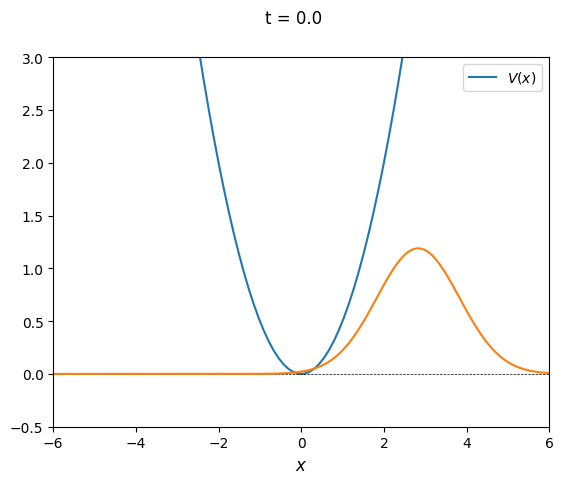

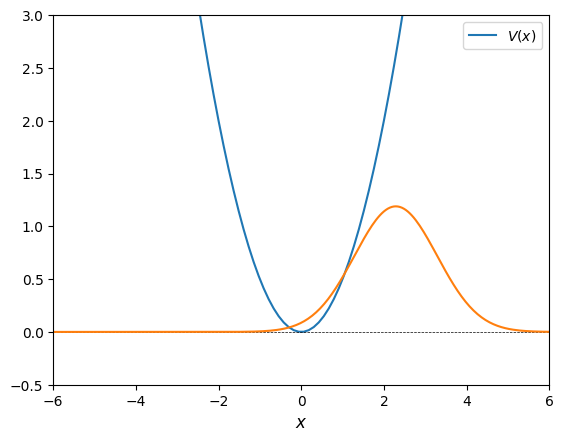

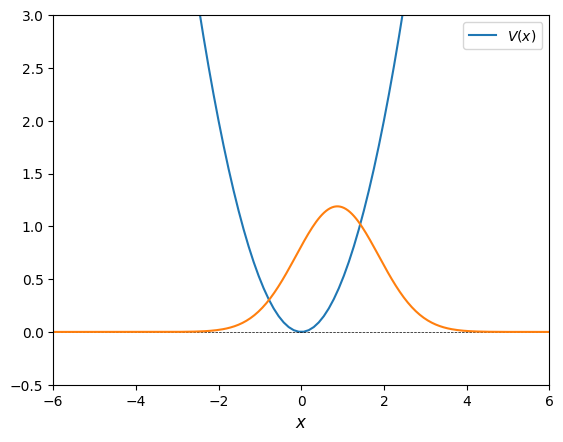

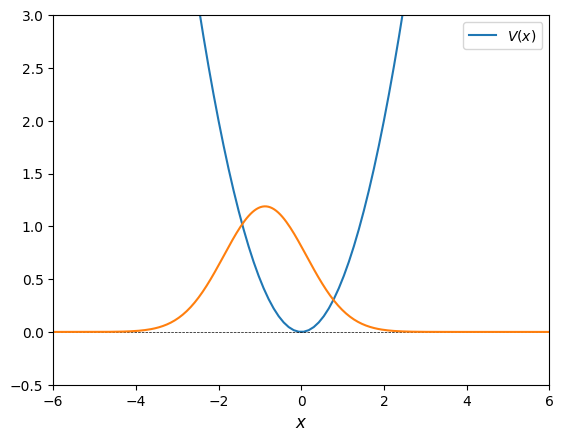

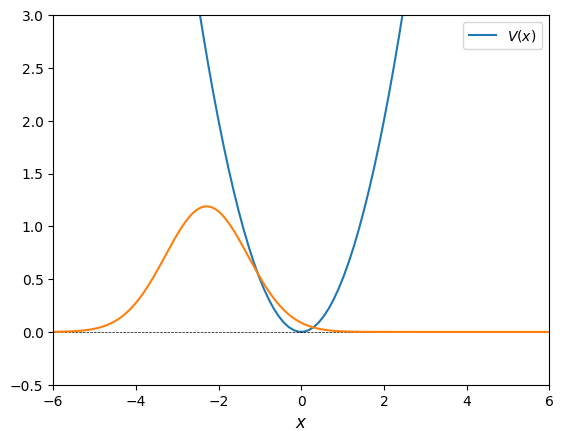

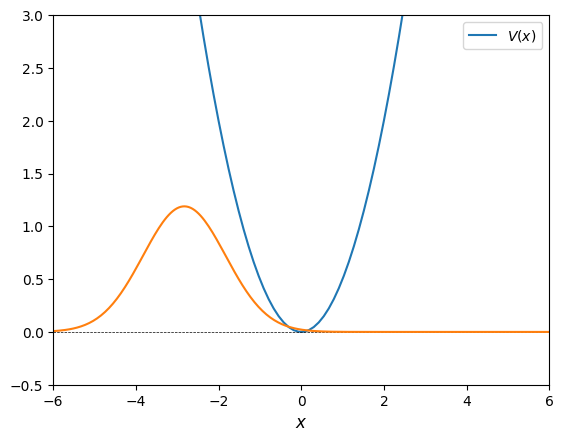

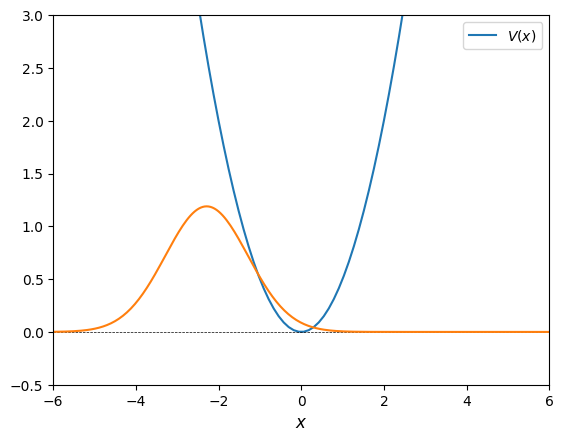

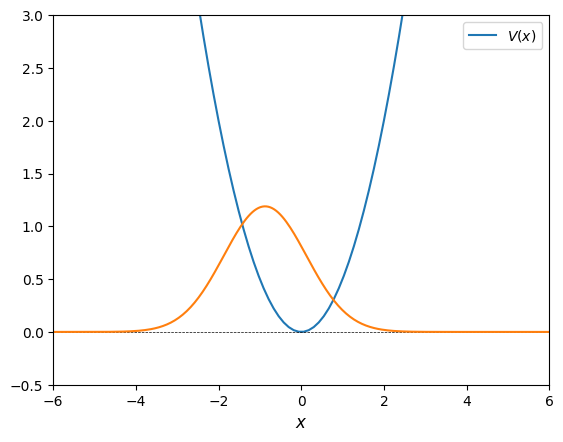

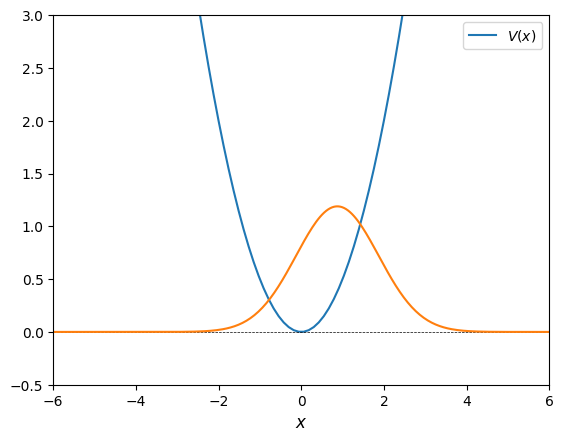

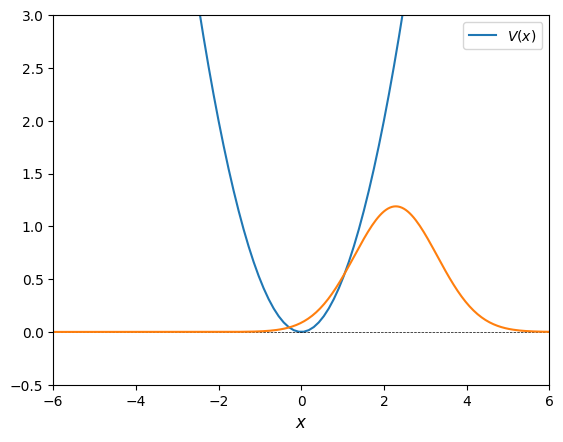

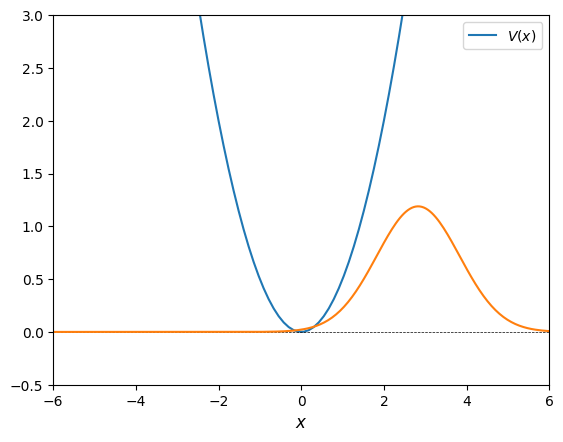

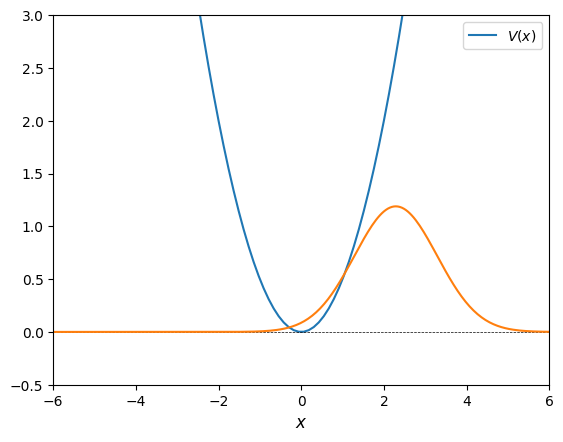

In [7]:
fig = plt.figure()      # buat figure kosong

def V(x):               # fungsi untuk potensial
    return 0.5 * x ** 2

xmin = -6               # atur batas x
xmax = 6
xlst = np.linspace(xmin, xmax, 100) # buat daftar nilai x

# Loop untuk semua titik waktu
for i in range(len(tlist)):

    # Buat gambar baru di matplotlib agar tidak tumpang tindih

    ax = plt.axes(xlim = (xmin, xmax), ylim = (-0.5, 3))
    
    # Plot potensial dan garis bantu 
    ax.plot(xlst, V(xlst), label = r"$V(x)$")
    ax.legend(loc = "best")

    ax.axhline(y = 0, ls = "--", lw = 0.5, c = 'k')
    
    # Buat object fungsi gelombang osilator harmonik
    psi_x = HarmonicOscillatorWaveFunction(psi = result.states[i], omega = w, extent = [xmin, xmax])
                                        # psi adalah keadaan osilator yang mau dikonversi ke ruang posisi
                                                # ingat gunakan atribut [.states] untuk mengambil keadaan
                                                # di tiap waktu dari object [Result].
                                        # extent adalah batas evaluasi ruang posisi

    psi_x.data = np.abs(psi_x.data)     # Ambil atribut [data] dari objek fungsi gelombang, lalu kita 
                                        # modifikasi dengan ambil nilai absolutnya.

    psi_x.visualize(fig = fig, ax = ax, show_ylabel = False) # Gunakan method [visualize] untuk menggambarkan fungsinya

    # Kasi judul, dibulatkan ke dua desimal di sini
    fig.suptitle(f't = {round(tlist[i], 2)}')

    plt.savefig(f"pics/{i:03d}.png", dpi = 600) # Simpan gambar untuk dipakai dengan ffmpeg
